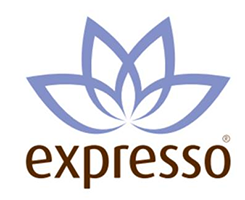

## Expresso Churn Prediction Challenge

**Description.**
Expresso is an African telecommunications company that provides customers with airtime and mobile data bundles. The objective of this challenge is to develop a machine learning model to predict the likelihood of each Expresso customer “churning,” i.e. becoming inactive and not making any transactions for 90 days.

This solution will help Expresso to better serve their customers by understanding which customers are at risk of leaving.

**The Variable and their defination:**

|User ID|English|
| :--- | :---|
REGION |The location of each client|
TENURE	|duration in the network|
MONTANT	|Top-up amount|
FREQUENCE_RECH	|Â number of times the customer refilled|
REVENUE	|client	monthly income of each client|
ARPU_SEGMENT|income over 90 days / 3|
FREQUENCE |number of times the client has made an income|
DATA_VOLUME|number of connections|
ON_NET|	inter expresso call|
ORANGE|call to orange|
TIGO |call to Tigo|
ZONE1	|call to zones1|
ZONE2	|call to zones2|
MRG	Â |a client who is going|
REGULARITY|number of times the client is active for 90 days|
TOP_PACK|the most active packs|
FREQ_TOP_PACK|number of times the client has activated the top pack packages|
CHURN|variable to predict - Target|

In [1]:
import pandas as pd                             #import pandas for dataframe manipulation
import numpy as np                              #import numerical python
import seaborn as sns                           #seaborn for visuals
import matplotlib as mpl                        #matplot for plotting
import matplotlib.pyplot as plt                 #matplot for plotting
import itertools
import datetime as dt                           #convert date formats
from scipy import stats                         #statistical analysis


from IPython.display import display             # Allows the use of display() for DataFrames
import warnings                                 # Suppress warnings 
warnings.filterwarnings('ignore') 
import os                                       # File system manangement
import gc                                       # memory management

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
# import data .
# previous data 
test=pd.read_csv("Test.csv")
train=pd.read_csv("Train.csv")
sample_sub=pd.read_csv("SampleSubmission.csv")
Variables=pd.read_csv("VariableDefinitions.csv")
# Current data

df_pack = pd.read_csv("TOP_PACK.csv")

In [3]:
!pip install pandas_profiling

You should consider upgrading via the 'c:\users\admin\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
test.shape

(380127, 18)

In [5]:
train.shape

(2154048, 19)

In [6]:
display("Test data")
display(test.head())

'Test data'

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [7]:
display('Train Data')
display(train.head())

'Train Data'

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [8]:
display('Sample Submission')
display(sample_sub.head())

'Sample Submission'

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [9]:
data=pd.concat([test,train],ignore_index=True)

In [10]:
data['TOP_PACK'].unique().tolist()

['On-net 1000F=10MilF;10d',
 'Data: 100 F=40MB,24H',
 nan,
 'All-net 500F=2000F;5d',
 'All-net 500F =2000F_AllNet_Unlimited',
 'Data:490F=1GB,7d',
 'On net 200F=Unlimited _call24H',
 'Data: 200 F=100MB,24H',
 'Data:1000F=2GB,30d',
 'MIXT:500F= 2500F on net _2500F off net;2d',
 'Data:3000F=10GB,30d',
 'On-net 500=4000,10d',
 'IVR Echat_Daily_50F',
 'VAS(IVR_Radio_Daily)',
 'Mixt 250F=Unlimited_call24H',
 'Data:200F=Unlimited,24H',
 'All-net 1000F=(3000F On+3000F Off);5d',
 'MIXT: 200mnoff net _unl on net _5Go;30d',
 'Twter_U2opia_Daily',
 'On-net 200F=60mn;1d',
 'On-net 300F=1800F;3d',
 'Data:1000F=5GB,7d',
 'All-net 600F= 3000F ;5d',
 'On-net 500F_FNF;3d',
 'Data:300F=100MB,2d',
 'Jokko_Daily',
 'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
 'Data:DailyCycle_Pilot_1.5GB',
 'Twter_U2opia_Weekly',
 '200=Unlimited1Day',
 'Data:500F=2GB,24H',
 'FNF2 ( JAPPANTE)',
 'On net 200F= 3000F_10Mo ;24H',
 'MROMO_TIMWES_RENEW',
 'Facebook_MIX_2D',
 'All-net 1000=5000;5d',
 'Jokko_Monthly',
 'Jokko_Week

In [11]:
# Vlookup for the python.
data=pd.merge(data,df_pack, on='TOP_PACK',how='outer')

In [12]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,Duration(days),Duration(hours)
count,1.644381e+06,1.644381e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.286702e+06,1.608986e+06,1.481697e+06,1.017158e+06,199582.000000,160900.000000,2.534175e+06,1.472802e+06,2.154048e+06,2.534175e+06,2.534175e+06
mean,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314,7.568571,2.804838e+01,9.270827e+00,1.875474e-01,3.009169e+03,3.010739e+03
std,7.112086e+03,1.326936e+01,7.188312e+03,2.396100e+03,1.468782e+01,1.311735e+04,8.729239e+02,2.048316e+02,6.380069e+01,42.408409,33.417872,2.228719e+01,1.227871e+01,3.903504e-01,9.571801e+05,9.571801e+05
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000e+00,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.362000e+03,2.454000e+03,2.000000e+01,2.893000e+03,1.560000e+02,9.900000e+01,2.000000e+01,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00,5.000000e+00,0.000000e+00
max,4.700000e+05,1.460000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00,3.051550e+08,3.051550e+08


In [13]:
data.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN', 'Package', 'Duration(days)', 'Duration(hours)'],
      dtype='object')

In [14]:
data['TOP_PACK'].tail(8)

2534167                  Data:OneTime_Pilot_1.5GB
2534168                           FIFA_TS_monthly
2534169                     GPRS_PKG_5GO_ILLIMITE
2534170                            Data_Mifi_20Go
2534171                           APANews_monthly
2534172    NEW_CLIR_TEMPRESTRICTED_LIBERTE_MOBILE
2534173                        GPRS_5Go_7D_PORTAL
2534174                          Package3_Monthly
Name: TOP_PACK, dtype: object

***Checking for duplication***

In [15]:
data.duplicated().sum()

0

In [16]:
data.isnull().sum()

user_id                  0
REGION              999027
TENURE                   0
MONTANT             889794
FREQUENCE_RECH      889794
REVENUE             853421
ARPU_SEGMENT        853421
FREQUENCE           853421
DATA_VOLUME        1247473
ON_NET              925189
ORANGE             1052478
TIGO               1517017
ZONE1              2334593
ZONE2              2373275
MRG                      0
REGULARITY               0
TOP_PACK           1061373
FREQ_TOP_PACK      1061373
CHURN               380127
Package            1061373
Duration(days)           0
Duration(hours)          0
dtype: int64

In [17]:
# Separate the categorical columns and numerical
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [18]:
display("The numerical columns in the data")
display(numerical_columns)

display("The categorical columns in the data")
display(categorical_columns)

'The numerical columns in the data'

['MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'CHURN',
 'Duration(days)',
 'Duration(hours)']

'The categorical columns in the data'

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK', 'Package']

In [19]:
data[['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']].nunique()

user_id     2534175
REGION           14
TENURE            8
MRG               1
TOP_PACK        142
dtype: int64

In [20]:
data[['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']].isnull().sum()

user_id           0
REGION       999027
TENURE            0
MRG               0
TOP_PACK    1061373
dtype: int64

In [21]:
data['REGION'].unique()

array(['THIES', 'SAINT-LOUIS', 'DAKAR', 'DIOURBEL', nan, 'KAOLACK',
       'KOLDA', 'LOUGA', 'ZIGUINCHOR', 'TAMBACOUNDA', 'MATAM', 'KAFFRINE',
       'FATICK', 'SEDHIOU', 'KEDOUGOU'], dtype=object)

In [22]:
data['TENURE'].unique()

array(['K > 24 month', 'J 21-24 month', 'I 18-21 month', 'G 12-15 month',
       'H 15-18 month', 'D 3-6 month', 'F 9-12 month', 'E 6-9 month'],
      dtype=object)

DAKAR          603886
THIES          211795
SAINT-LOUIS    141255
LOUGA          116458
KAOLACK        113956
DIOURBEL        78603
TAMBACOUNDA     64893
KAFFRINE        51717
KOLDA           45548
FATICK          42003
MATAM           34315
ZIGUINCHOR      25847
SEDHIOU          3662
KEDOUGOU         1210
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

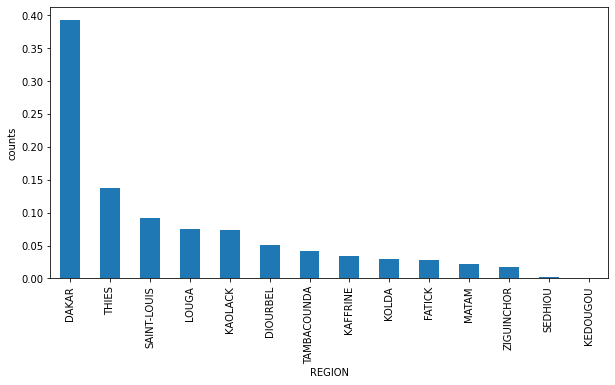

In [23]:
print(data['REGION'].value_counts())
plt.figure(figsize=(10,5))
data['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2403551
I 18-21 month      53431
H 15-18 month      30646
G 12-15 month      17577
J 21-24 month      14940
F 9-12 month       10982
E 6-9 month         2137
D 3-6 month          911
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

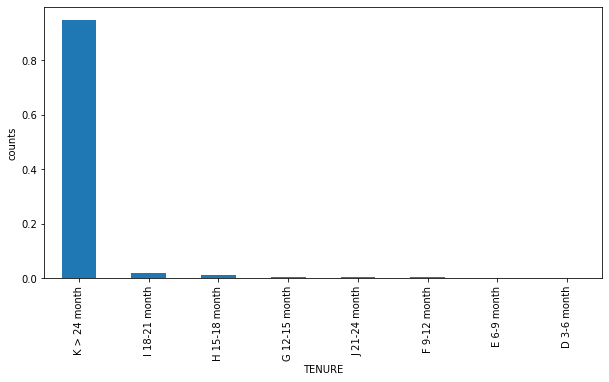

In [24]:
print(data['TENURE'].value_counts())
plt.figure(figsize=(10,5))
data['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2534175
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

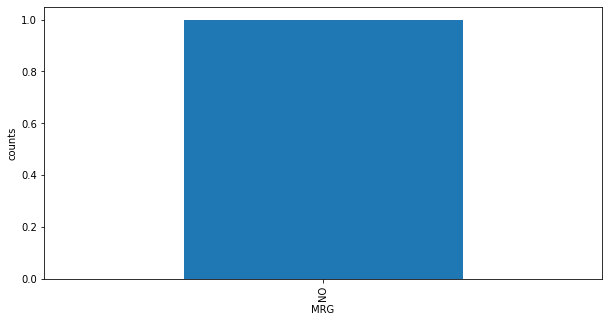

In [25]:
print(data['MRG'].value_counts())
plt.figure(figsize=(10,5))
data['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net                              456011
Data                                 424484
On net                               270069
MIXT                                 184634
Jokko                                 54660
IVR                                   33778
Twter_U2opia                          21306
VAS                                   17548
Unlimited                              1798
MROMO                                  1279
pilot                                  1181
Facebook                                857
WIFI                                    787
CVM                                     736
SUPERMAGIK                              620
Yewouleen                               531
International                           521
YMGX                                    514
New_YAKALMA                             505
FNF                                     291
EVC                                     246
Staff_CPE_Rent                          120
FIFA                            

Text(0.5, 0, 'Package')

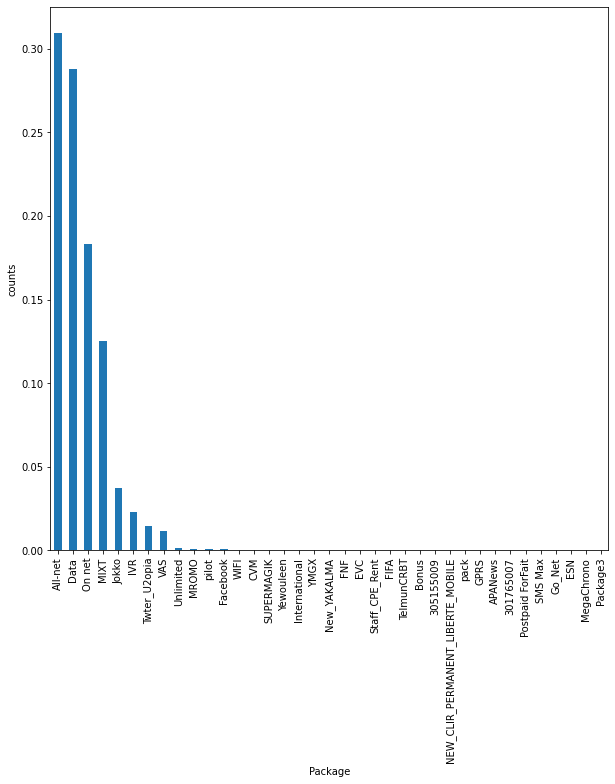

In [26]:
#probaly not the best way to visualize this

print(data['Package'].value_counts())
plt.figure(figsize=(10,10))
data['Package'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Package')


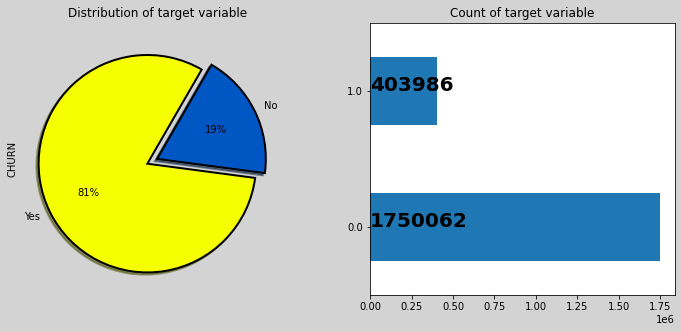

In [27]:
# Distribution of the target variable
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
data["CHURN"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),
                                                                             startangle = 60,
                                            labels=["Yes","No"],wedgeprops={"linewidth":2,"edgecolor":"k"},
                                            explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = data["CHURN"].value_counts().plot(kind="barh")

for i,j in enumerate(data["CHURN"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

1. Missing Values
2. Outliers
3. Duplicate

In [28]:
data['TENURE'].unique()

array(['K > 24 month', 'J 21-24 month', 'I 18-21 month', 'G 12-15 month',
       'H 15-18 month', 'D 3-6 month', 'F 9-12 month', 'E 6-9 month'],
      dtype=object)

In [29]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,Duration(days),Duration(hours)
count,1.644381e+06,1.644381e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.286702e+06,1.608986e+06,1.481697e+06,1.017158e+06,199582.000000,160900.000000,2.534175e+06,1.472802e+06,2.154048e+06,2.534175e+06,2.534175e+06
mean,5.531041e+03,1.152773e+01,5.509137e+03,1.836385e+03,1.397511e+01,3.363396e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314,7.568571,2.804838e+01,9.270827e+00,1.875474e-01,3.009169e+03,3.010739e+03
std,7.112086e+03,1.326936e+01,7.188312e+03,2.396100e+03,1.468782e+01,1.311735e+04,8.729239e+02,2.048316e+02,6.380069e+01,42.408409,33.417872,2.228719e+01,1.227871e+01,3.903504e-01,9.571801e+05,9.571801e+05
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000e+00,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.362000e+03,2.454000e+03,2.000000e+01,2.893000e+03,1.560000e+02,9.900000e+01,2.000000e+01,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00,5.000000e+00,0.000000e+00
max,4.700000e+05,1.460000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4.174000e+03,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00,3.051550e+08,3.051550e+08


In [30]:
# Convert the tenure to numerical data.

def term_months(row):
    """ segmenting the data into tenure to terms.
    
    """
    if row['TENURE'] == 'K > 24 month':
        return 24
    elif row['TENURE'] == 'I 18-21 month':
        return 19.5
    elif row['TENURE'] == 'J 21-24 month':
        return 23.5
    elif row['TENURE'] == 'F 9-12 month':
        return 10.5
    elif row['TENURE'] == 'G 12-15 month':
        return 13.5
    elif row['TENURE'] == 'H 15-18 month':
        return 16.5
    elif row['TENURE'] == 'E 6-9 month':
        return 7.5
    else:
        return 4.5
data['Tenure(Months)'] = data.apply(term_months, axis=1)

In [31]:
data['Tenure(Year)']=(data['Tenure(Months)']/12).apply(int)

In [32]:
data['Tenure(Year)'].unique()

array([2, 1, 0], dtype=int64)

In [33]:
data.shape

(2534175, 24)

### Duplication on the numerical data.

In [34]:
# Separate the categorical columns and numerical
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

display("The numerical columns in the data")
display(numerical_columns)

display("The categorical columns in the data")
display(categorical_columns)

'The numerical columns in the data'

['MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'CHURN',
 'Duration(days)',
 'Duration(hours)',
 'Tenure(Months)',
 'Tenure(Year)']

'The categorical columns in the data'

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK', 'Package']

The following are the numerical data so based on the above description the following columns 75% quartile deviation from the maximum value is way too high.
1. MONTANT
2. FREQUENCE_RECH
3. REVENUE
4. ARPU_SEGMENT
5. FREQUENCE
6. DATA_VOLUME
7. ON_NET
8. ORANGE
9. TIGO
10. ZONE1
11. ZONE2
12. FREQ_TOP_PACK

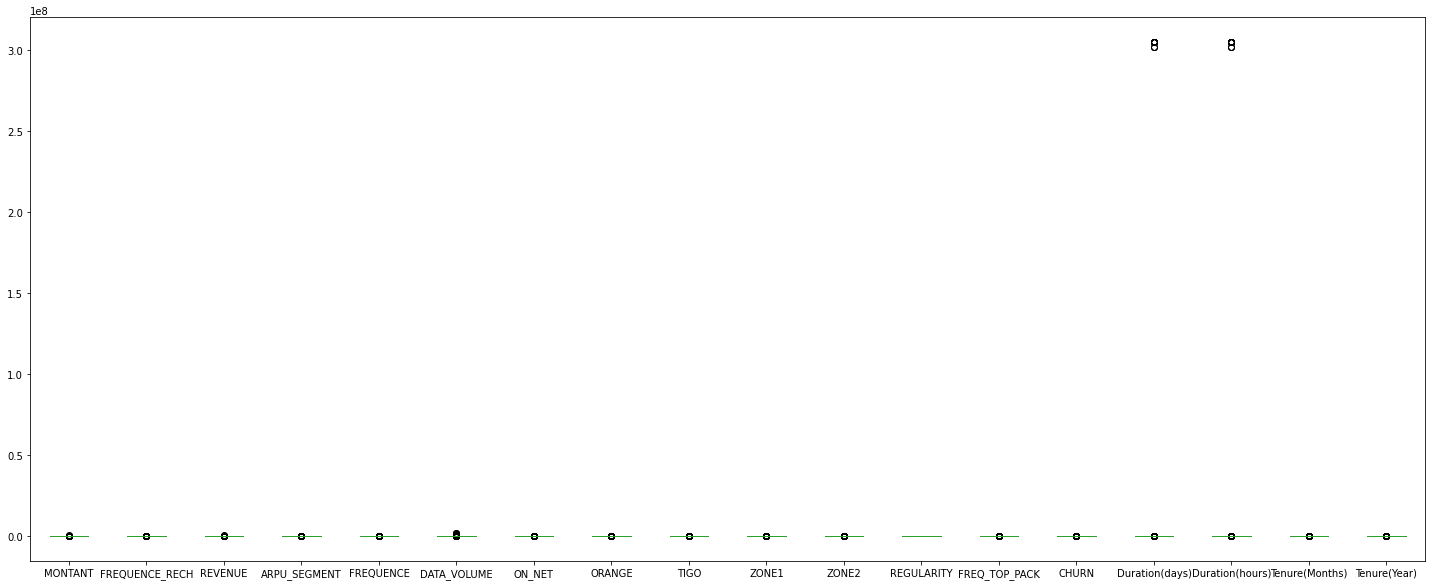

In [35]:
# indentify the outliers in the datasets
data.plot(figsize=(25,10),kind='box')
plt.show()

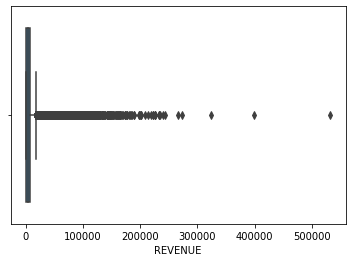

In [36]:
sns.boxplot(data=data,x=data['REVENUE']);

In [37]:
Q2=data['REVENUE'].quantile(0.50)
Q3=data['REVENUE'].quantile(0.95)

print(Q2)
print(Q3)

3000.0
18750.0


In [38]:
data['REVENUE'] = np.where(data['REVENUE'] > Q2, Q3, data['REVENUE'])

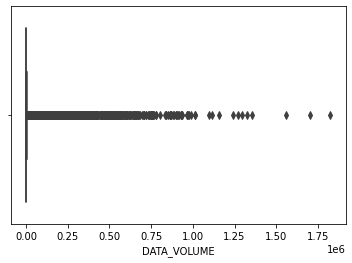

In [39]:
sns.boxplot(data=data,x=data['DATA_VOLUME']);

In [40]:
Q2=data['DATA_VOLUME'].quantile(0.50)
Q3=data['DATA_VOLUME'].quantile(0.95)

print(Q2)
print(Q3)

data['DATA_VOLUME'] = np.where(data['DATA_VOLUME'] > Q2, Q3, data['DATA_VOLUME'])

258.0
15003.0


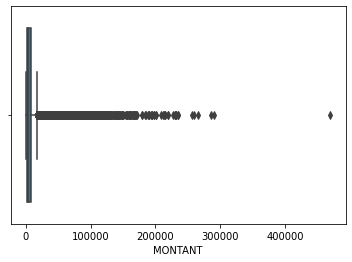

In [41]:
sns.boxplot(data=data,x=data['MONTANT']);

In [42]:
Q2=data['MONTANT'].quantile(0.50)
Q3=data['MONTANT'].quantile(0.95)

print(Q2)
print(Q3)

data['MONTANT'] = np.where(data['MONTANT'] > Q2, Q3, data['MONTANT'])

3000.0
18500.0


In [43]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,Duration(days),Duration(hours),Tenure(Months),Tenure(Year)
count,1.644381e+06,1.644381e+06,1.680754e+06,1.680754e+06,1.680754e+06,1.286702e+06,1.608986e+06,1.481697e+06,1.017158e+06,199582.000000,160900.000000,2.534175e+06,1.472802e+06,2.154048e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06
mean,9.852338e+03,1.152773e+01,9.942404e+03,1.836385e+03,1.397511e+01,7.510687e+03,2.778569e+02,9.538476e+01,2.310065e+01,8.169314,7.568571,2.804838e+01,9.270827e+00,1.875474e-01,3.009169e+03,3.010739e+03,2.365922e+01,1.942919e+00
std,8.634293e+03,1.326936e+01,8.801625e+03,2.396100e+03,1.468782e+01,7.488788e+03,8.729239e+02,2.048316e+02,6.380069e+01,42.408409,33.417872,2.228719e+01,1.227871e+01,3.903504e-01,9.571801e+05,9.571801e+05,1.706837e+00,2.547463e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000e+00,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,2.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,2.000000e+00
75%,1.850000e+04,1.600000e+01,1.875000e+04,2.454000e+03,2.000000e+01,1.500300e+04,1.560000e+02,9.900000e+01,2.000000e+01,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00,5.000000e+00,0.000000e+00,2.400000e+01,2.000000e+00
max,1.850000e+04,1.460000e+02,1.875000e+04,1.773920e+05,9.100000e+01,1.500300e+04,5.080900e+04,2.132300e+04,4.174000e+03,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00,3.051550e+08,3.051550e+08,2.400000e+01,2.000000e+00


In [44]:
df_null_per=data.isnull().sum()/len(data)*100
df_null_per.sort_values(ascending = False)

ZONE2              93.650794
ZONE1              92.124380
TIGO               59.862362
DATA_VOLUME        49.226001
Package            41.882388
FREQ_TOP_PACK      41.882388
TOP_PACK           41.882388
ORANGE             41.531386
REGION             39.422179
ON_NET             36.508489
FREQUENCE_RECH     35.111782
MONTANT            35.111782
FREQUENCE          33.676482
ARPU_SEGMENT       33.676482
REVENUE            33.676482
CHURN              15.000030
Duration(hours)     0.000000
Duration(days)      0.000000
Tenure(Months)      0.000000
user_id             0.000000
REGULARITY          0.000000
MRG                 0.000000
TENURE              0.000000
Tenure(Year)        0.000000
dtype: float64

In [45]:
threshold = 0.8

#Dropping columns with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean() < threshold]]

In [46]:
data['FREQUENCE_RECH'].head()

0     5.0
1     1.0
2     8.0
3     4.0
4    13.0
Name: FREQUENCE_RECH, dtype: float64

In [47]:
# filling categorical data using ffill
data['REGION']=data['REGION'].fillna(method ='Ffill')
data['TOP_PACK']=data['TOP_PACK'].fillna(method ='Ffill')
data['Package']= data['Package'].fillna(method='Ffill')

In [48]:
data.shape

(2534175, 22)

In [49]:
# fill the numerical data using median

data['FREQUENCE_RECH']=data['FREQUENCE_RECH'].fillna((data['FREQUENCE_RECH'].mean()))

data['MONTANT'] = data['MONTANT'].fillna((data['MONTANT'].mean()))
                                        
data['REVENUE']=data['REVENUE'].fillna((data['REVENUE'].mean()))

data['ARPU_SEGMENT']=data['ARPU_SEGMENT'].fillna(data['ARPU_SEGMENT'].mean())

data['FREQUENCE']=data['FREQUENCE'].fillna(data['FREQUENCE'].mean())

data['REGULARITY']=data['REGULARITY'].fillna(data['REGULARITY'].mean())

data['DATA_VOLUME']=data['DATA_VOLUME'].fillna(data['DATA_VOLUME'].mean())

data['ON_NET']=data['ON_NET'].fillna(data['ON_NET'].mean())

data['ORANGE']=data['ORANGE'].fillna(data['ORANGE'].mean())

data['TIGO']=data['TIGO'].fillna(data['TIGO'].median())

data['ZONE1']=data['ZONE1'].fillna((data['ZONE1'].mean())
                                   
data['ZONE2']=data['ZONE2'].fillna((data['ZONE2'].mean())

data['FREQ_TOP_PACK']=data['FREQ_TOP_PACK'].fillna(data['FREQ_TOP_PACK'].mean())

data['Tenure(Months)']=data['Tenure(Months)'].fillna(data['Tenure(Months)'].mean())

In [50]:
data.shape

(2534175, 22)

In [51]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN,Duration(days),Duration(hours),Tenure(Months),Tenure(Year)
count,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.154048e+06,2.534175e+06,2.534175e+06,2.534175e+06,2.534175e+06
mean,7.446360e+03,9.937962e+00,7.604447e+03,1.554720e+03,1.229967e+01,3.940479e+03,1.862728e+02,6.781425e+01,1.286380e+01,2.804838e+01,9.270827e+00,1.875474e-01,3.009169e+03,3.010739e+03,2.365922e+01,1.942919e+00
std,7.685874e+03,1.090519e+01,7.883204e+03,1.990998e+03,1.219055e+01,6.451532e+03,7.059672e+02,1.600038e+02,4.128046e+01,2.228719e+01,9.360659e+00,3.903504e-01,9.571801e+05,9.571801e+05,1.706837e+00,2.547463e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00
25%,2.000000e+03,4.000000e+00,1.901000e+03,6.340000e+02,6.000000e+00,2.310000e+02,1.200000e+01,2.000000e+01,6.000000e+00,6.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,2.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.580000e+02,2.700000e+01,2.900000e+01,6.000000e+00,2.400000e+01,9.270827e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,2.000000e+00
75%,1.850000e+04,1.000000e+01,1.875000e+04,1.567000e+03,1.300000e+01,1.500300e+04,5.500000e+01,4.100000e+01,6.000000e+00,5.100000e+01,9.270827e+00,0.000000e+00,5.000000e+00,0.000000e+00,2.400000e+01,2.000000e+00
max,1.850000e+04,1.460000e+02,1.875000e+04,1.773920e+05,9.100000e+01,1.500300e+04,5.080900e+04,2.132300e+04,4.174000e+03,6.200000e+01,7.130000e+02,1.000000e+00,3.051550e+08,3.051550e+08,2.400000e+01,2.000000e+00


In [52]:
# converting the categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['REGION'] = le.fit_transform(data['REGION'])
data['TENURE']=le.fit_transform(data['TENURE'])
data['TOP_PACK']=le.fit_transform(data['TOP_PACK'])
data['MRG'] = le.fit_transform(data['MRG'])
data['Package']=le.fit_transform(data['Package'])


### Model Feature Selection:

**1.1 Correlation Matrix:**
    
We are trying to see how each variable relate to each other and the how it relate to target variable.

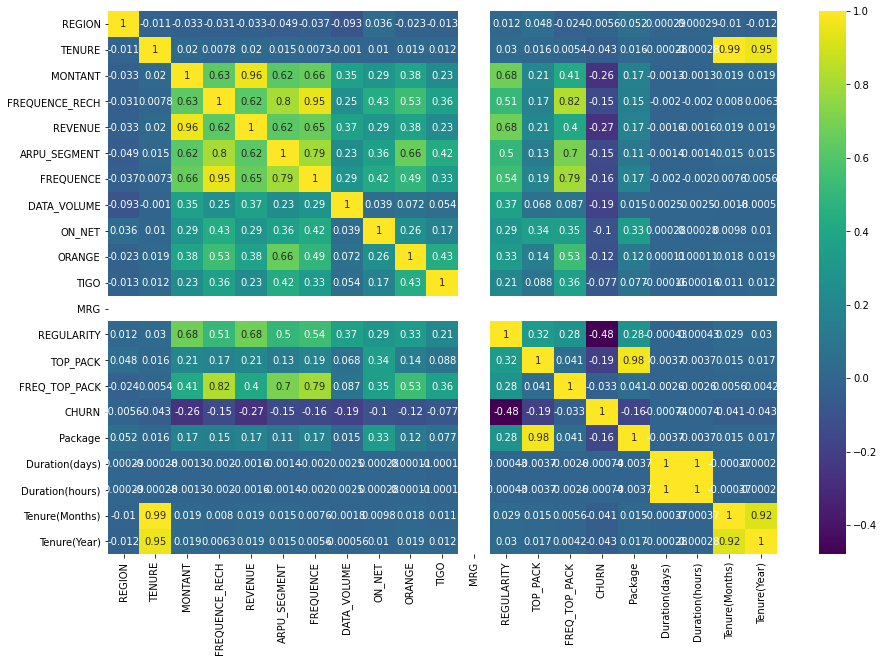

In [53]:
import seaborn as sns
cm = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, cmap = 'viridis');

We want to indentify any column that have 0 feature importance and drop it.


In [54]:
data['CHURN'] = np.nan_to_num(data['CHURN']).astype(int)

In [55]:
from sklearn.preprocessing import StandardScaler
X = data.drop(['user_id',"CHURN"],1).select_dtypes(exclude=['object'])
print("Train Set Shape: {} Rows, {} Columns".format(*X.shape))
test = data.drop(["CHURN"], axis=1)
print("Submission Set Shape: {} Rows, {} Columns".format(*test.shape))
y = data["CHURN"]
# Standardizing the features
#X = StandardScaler().fit_transform(X)

Train Set Shape: 2534175 Rows, 20 Columns
Submission Set Shape: 2534175 Rows, 21 Columns


In [56]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03934746 0.00212931 0.06970817 0.0310603  0.09624706 0.05999614
 0.03585811 0.07324433 0.07065714 0.04158639 0.02626526 0.
 0.36714863 0.03193924 0.02198139 0.01831933 0.00661964 0.0039955
 0.0021942  0.00170238]


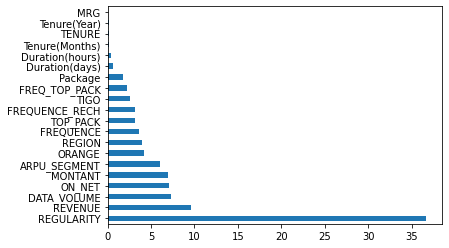

In [57]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)*100
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [58]:
# Find the features with zero importance
zero_features = feat_importances[feat_importances <= 1.5]
print('There are %d features with 0.0 importance' % len(zero_features))
feat_importances.tail()

There are 6 features with 0.0 importance


Package            1.831933
Duration(days)     0.661964
Duration(hours)    0.399550
Tenure(Months)     0.219420
Tenure(Year)       0.170238
dtype: float64

In [59]:
data = data.drop(columns = ['MRG','Tenure(Year)','Tenure(Months)','Duration(hours)','Duration(days)','Zone1','Zone2'])
print('data: ', train.shape)

data:  (2154048, 19)


In [60]:
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,Package
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,12,7,18500.0,5.0,18750.0,1667.0,5.0,258.0,378.0,11.0,5.0,42,110,5.0,0,22
1,00232dd1a32d6cf19e7303fb273bd4af293dd174,9,7,1000.0,1.0,1000.0,333.0,1.0,258.0,50.0,29.0,6.0,15,110,1.0,0,22
2,00272a0dd86105139bf3e220c57648b3e30441d6,9,7,18500.0,8.0,18750.0,3833.0,10.0,258.0,724.0,39.0,58.0,62,110,5.0,0,22
3,0029072c7ddc255bd4b8080dcdab7cfb0520ea12,0,7,2200.0,4.0,2200.0,733.0,4.0,0.0,209.0,43.0,5.0,55,110,1.0,0,22
4,002b776fe886cc656ff96208da0d89298dcd08a8,12,7,18500.0,13.0,18750.0,3946.0,16.0,15003.0,665.0,75.0,10.0,62,110,8.0,0,22


## Machine Learning

In [120]:
# Some sklearn tools for preprocessing and building a pipeline. 
# ColumnTransformer was introduced in 0.20 so make sure you have this version
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Our algorithms, by from the easiest to the hardest to intepret.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

In [133]:

from sklearn.preprocessing import StandardScaler
X = data.drop(['user_id',"CHURN"],1).select_dtypes(exclude=['object'])
print("Train Set Shape: {} Rows, {} Columns".format(*X.shape))
test = data.drop(["CHURN"], axis=1)
print("Submission Set Shape: {} Rows, {} Columns".format(*test.shape))
y = data["CHURN"]

# Standardizing the features
#X = StandardScaler().fit_transform(X)

Train Set Shape: 2534175 Rows, 15 Columns
Submission Set Shape: 2534175 Rows, 16 Columns


In [134]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,Package
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,12,7,18500.0,5.0,18750.0,1667.0,5.0,258.0,378.0,11.0,5.0,42,110,5.0,22
1,00232dd1a32d6cf19e7303fb273bd4af293dd174,9,7,1000.0,1.0,1000.0,333.0,1.0,258.0,50.0,29.0,6.0,15,110,1.0,22
2,00272a0dd86105139bf3e220c57648b3e30441d6,9,7,18500.0,8.0,18750.0,3833.0,10.0,258.0,724.0,39.0,58.0,62,110,5.0,22
3,0029072c7ddc255bd4b8080dcdab7cfb0520ea12,0,7,2200.0,4.0,2200.0,733.0,4.0,0.0,209.0,43.0,5.0,55,110,1.0,22
4,002b776fe886cc656ff96208da0d89298dcd08a8,12,7,18500.0,13.0,18750.0,3946.0,16.0,15003.0,665.0,75.0,10.0,62,110,8.0,22


In [135]:
features_sample_final = data

In [136]:
train=features_sample_final[(features_sample_final['CHURN'] == 1) | (features_sample_final['CHURN'] == 0)]

In [126]:
#test=data[data['CHURN'] < 0]

In [137]:
#split the train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.05, random_state=42)

**Dummy Classifier**

Suppose you wish to determine whether a given object possesses or does not possess a certain property. If you have analyzed a large number of those objects and have found that 90% contain the target property, then guessing that every future instance of the object possesses the target property gives you a 90% likelihood of guessing correctly. Structuring your guesses this way is equivalent to using the most_frequent method in the documentation you cite.

In [138]:
from sklearn.dummy import DummyClassifier
clf_dummy = DummyClassifier(strategy="most_frequent")
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf_dummy.fit(X_train, y_train)
clf_dummy.score(X_test, y_test)

0.8402731302009016

In [139]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X[cols],dtrain_Y)
    predictions = algorithm.predict(dtest_X[cols])
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X[cols])[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")


In [140]:
X.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,Package
0,12,7,18500.0,5.0,18750.0,1667.0,5.0,258.0,378.0,11.0,5.0,42,110,5.0,22
1,9,7,1000.0,1.0,1000.0,333.0,1.0,258.0,50.0,29.0,6.0,15,110,1.0,22
2,9,7,18500.0,8.0,18750.0,3833.0,10.0,258.0,724.0,39.0,58.0,62,110,5.0,22
3,0,7,2200.0,4.0,2200.0,733.0,4.0,0.0,209.0,43.0,5.0,55,110,1.0,22
4,12,7,18500.0,13.0,18750.0,3946.0,16.0,15003.0,665.0,75.0,10.0,62,110,8.0,22


LogisticRegression()
Accuracy score :  0.8576894422486836
Recall score   :  0.6076109854100024
classification report :
               precision    recall  f1-score   support

           0       0.96      0.88      0.92    582276
           1       0.31      0.61      0.41     51268

    accuracy                           0.86    633544
   macro avg       0.64      0.74      0.66    633544
weighted avg       0.91      0.86      0.88    633544



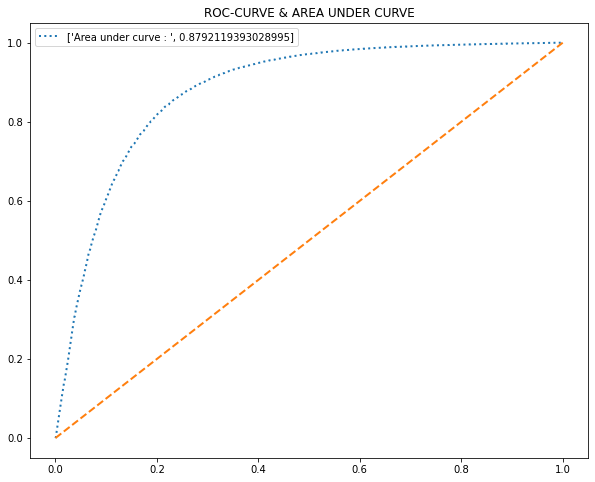

In [141]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
model(logit,X_train,y_train,X_test,y_test,X_train.columns)

GaussianNB()
Accuracy score :  0.6156210144836034
Recall score   :  0.28498309499134356
classification report :
               precision    recall  f1-score   support

           0       0.56      0.98      0.71    302577
           1       0.93      0.28      0.44    330967

    accuracy                           0.62    633544
   macro avg       0.74      0.63      0.57    633544
weighted avg       0.75      0.62      0.57    633544



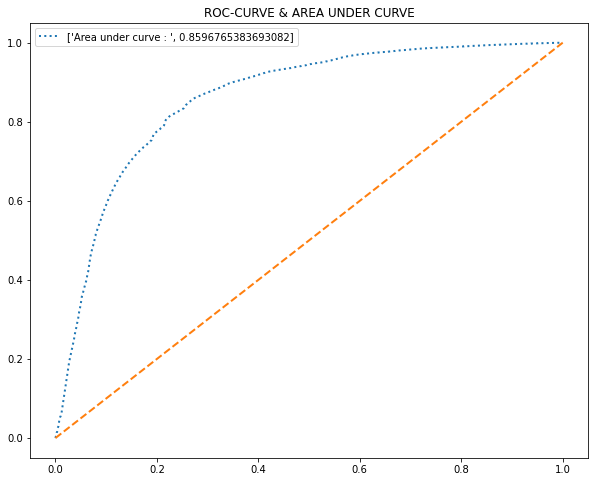

In [142]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model(gnb,X_train,y_train,X_test,y_test,X_train.columns)
#model.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
Accuracy score :  0.8644135213970932
Recall score   :  0.5976803004368597
classification report :
               precision    recall  f1-score   support

           0       0.94      0.90      0.92    555258
           1       0.46      0.60      0.52     78286

    accuracy                           0.86    633544
   macro avg       0.70      0.75      0.72    633544
weighted a

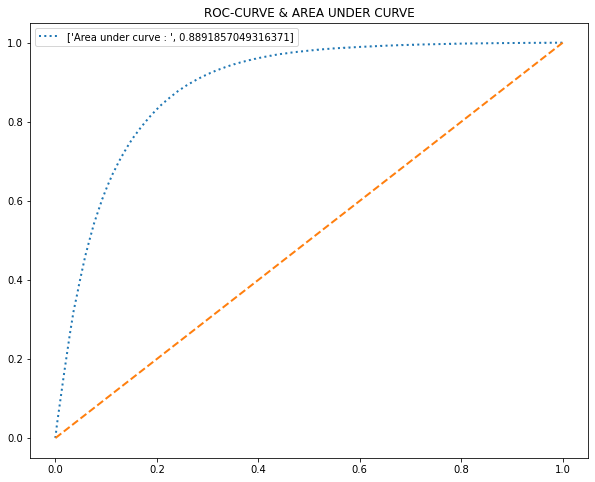

In [143]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric='logloss')
model(xgb,X_train,y_train,X_test,y_test,X_train.columns)

#### Random Forest Classifier

RandomForestClassifier()
Accuracy score :  0.8609867665071408
Recall score   :  0.5795034593062001
classification report :
               precision    recall  f1-score   support

           0       0.93      0.90      0.92    551013
           1       0.47      0.58      0.52     82531

    accuracy                           0.86    633544
   macro avg       0.70      0.74      0.72    633544
weighted avg       0.87      0.86      0.87    633544



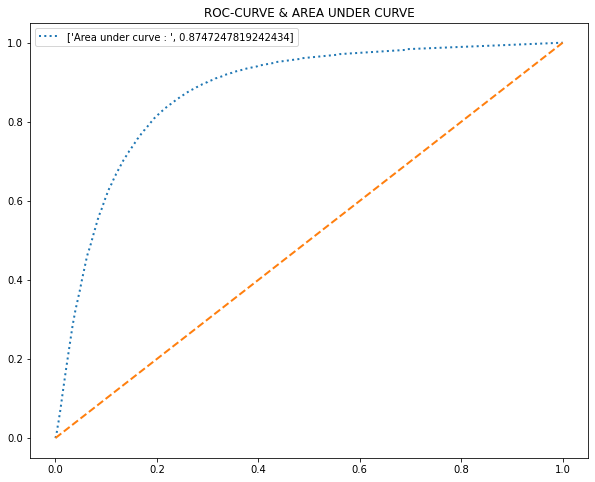

In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(rfc,X_train,y_train,X_test,y_test,X_train.columns)

#### Decision Tree Clasifier

DecisionTreeClassifier()
Accuracy score :  0.8389267359488843
Recall score   :  0.49577224650826224
classification report :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90    532663
           1       0.49      0.50      0.50    100881

    accuracy                           0.84    633544
   macro avg       0.70      0.70      0.70    633544
weighted avg       0.84      0.84      0.84    633544



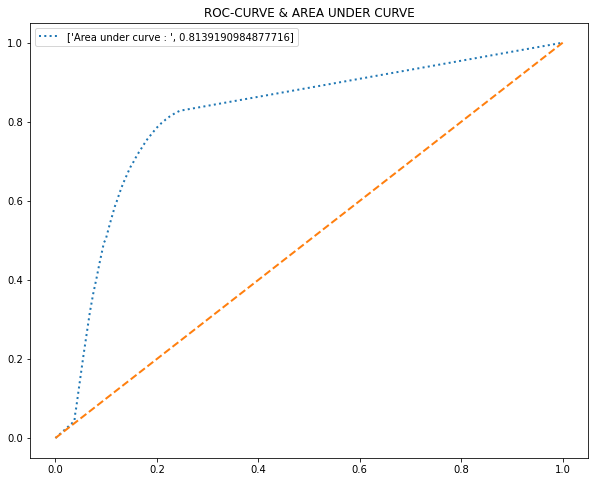

In [145]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model(dtc,X_train,y_train,X_test,y_test,X_train.columns)

#### Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
model(gbc,X_train,y_train,X_test,y_test,X_train.columns)

The model that performed the best was the gradient boost classifier with a 86 % of accuracy and 

In [ ]:
test_X_1 = test[[i for i in test.columns if i not in ['user_id']]]
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
sub_prob = gbc.predict_proba(test_X_1)[:,1]
sub_prob = pd.DataFrame(sub_prob)
ids = test[["user_id"]]
subm  = ids.merge(sub_prob,left_index=True,right_index=True,how="left")
sample_submission  = subm.rename(columns={"user_id":'user_id',0:'CHURN'})

In [ ]:
sample_submission.head()

In [ ]:
sample_submission.to_csv("best_2_model.csv",index = False)